In [159]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl  
import seaborn as sns
import numpy as np
import itertools
from scipy import stats
from emoji import UNICODE_EMOJI

Hipóteses

\begin{equation*}
   H_0:\mbox{Tem poucas meninas na engenharia por motivos externos} \rightarrow \mu_B=\mu_A \rightarrow \mu_B-\mu_A=0
\end{equation*}   
\begin{equation*}
   H_a:\mbox{Tem poucas meninas na engenharia por motivos internos} \rightarrow \mu_B\neq\mu_A \rightarrow \mu_B-\mu_A\neq0
\end{equation*}


Motivos externos: Mercado de trabalho, Salário, Vontade de outros
    
Motivos internos: Gosto por exatas/ curso

# 1a Análise: Faz ou não engenharia no Insper?

### Ler Arquivos Excel e colocar em um DataFrame

## PRIMEIRO SHEET : meninas na engenharia insper

Lendo arquivo Excel

In [160]:
eng_insper = pd.read_excel('PESQUISA.xlsx', sheet_name = 0)

Limpar o DataFrame e Renomear algumas colunas

In [175]:
eng_insper = eng_insper.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual engenharia?": "TIPO_ENG", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM", 'Insper foi sua 1a opcao?': 'Sua atual faculdade foi sua 1a opção?', 'Como descobriu o Insper?':'Como descobriu sua faculdade?', 'Por que Insper?': 'Por que escolheu sua faculdade?'})


semestre=[]

for k in eng_insper.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
eng_insper.SEMESTRE = semestre


eng_insper['Se "Não", qual?'] = eng_insper['Se "Não", qual?'].fillna('Insper')

eng_insper['Se SIM na pergunta anterior,  quais familiares?'] = eng_insper['Se SIM na pergunta anterior,  quais familiares?'].fillna('Ninguém')

In [176]:
eng_insper['Fez Insper?']='Sim'


In [177]:
eng_insper_idx=eng_insper.set_index('NOME')

## SEGUNDO SHEET: engenharia de outras faculdades

Lendo arquivo Excel

In [178]:
eng_geral = pd.read_excel('PESQUISA.xlsx', sheet_name = 1)


Limpar o DataFrame e Renomear algumas colunas

In [179]:
eng_geral = eng_geral.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual engenharia?": "TIPO_ENG", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM"})


eng_geral['Se SIM na pergunta anterior,  quais familiares?'] = eng_geral['Se SIM na pergunta anterior,  quais familiares?'].fillna('Ninguém')


eng_geral['Se "Não", qual?'] = eng_geral['Se "Não", qual?'].fillna('A atual')


semestre=[]

for k in eng_geral.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
eng_geral.SEMESTRE = semestre

In [180]:
eng_geral = eng_geral.drop('Distância da faculdade de casa...', 1)

In [181]:
eng_geral['Fez Insper?']='Não'


In [182]:
eng_geral_idx=eng_geral.set_index('NOME')

* Juntando os DataFrames

In [183]:
eng_geral.shape

(90, 20)

In [184]:
len(eng_insper_idx)

30

In [185]:
len(eng_geral_idx)

90

In [186]:
len(pd.concat([eng_insper_idx, eng_geral_idx], sort=True))

120

In [187]:
eng = pd.concat([eng_insper_idx, eng_geral_idx], sort=True)
eng

,Algum familiar trabalha na área de engenharia?,Com quantos anos você espera se aposentar?,Como descobriu sua faculdade?,ESTADO/CID,Engenharia foi sua 1a escolha?,Fez Insper?,IDADE,NOME_EM,Por que escolheu Engenharia?,Por que escolheu sua faculdade?,Quanto você espera ganhar no seu início de sua carreira?,SEMESTRE,"Se ""Não"", qual?","Se ""Sim"" na pergunta anterior, quais familiares?","Se SIM na pergunta anterior, quais familiares?",Sua atual faculdade foi sua 1a opção?,TIPO_EM,TIPO_ENG,Ter poucas meninas na engenharia te desmotiva a ingressar na engenharia?,Você pretende ter filhos?
NOME,,,,,,,,,,,,,,,,,,,,
Vitória de Almeida Oliveira,Não,Entre 62 a 65 anos,Por amigos,osasco/são paulo,Sim,Sim,Entre 19 a 21 anos,Coc Sapiens,Gosta de Exatas,"Infraestrutura, Reconhecimento no mercado devi...",R$ 15000 - R$ 20000,8,Insper,Ninguém,Ninguém,Sim,Escola Privada,Engenharia Mecatrônica,Não,Não
manuela castilla,Sim,Entre 62 a 65 anos,"Por amigos, Por família",são paulo são paulo,Não,Sim,Entre 16 a 18 anos,Escola da vila,"Gosta de Exatas, Desde de criança brinca com e...","Infraestrutura, Ensino diferenciado",R$ 5000 - R$ 10000,8,Insper,Pai e tio,Pai e tio,Sim,Escola Privada,Engenharia Mecatrônica,Não,Sim
Mariana Sophia Abrantes,Sim,Entre 62 a 65 anos,Por amigos,Sao Paulo/Sao Paulo,Sim,Sim,Entre 19 a 21 anos,Colégio Dante Alighieri,"Gosta de Exatas, Desde de criança brinca com e...","Infraestrutura, Reconhecimento no mercado devi...",R$ 5000 - R$ 10000,8,Instituto Mauá de Tecnologia,Pai e mãe,Pai e mãe,Não,Escola Privada,Engenharia Mecânica,Não,Sim
Maria Clara Luques,Sim,Entre 65 a 70 anos,"Por amigos, Por família",Barueri/SP,Sim,Sim,Entre 19 a 21 anos,Pueri Domus,"Gosta de Exatas, Desde de criança brinca com e...","Infraestrutura, Ensino diferenciado",R$ 5000 - R$ 10000,8,Insper,"Pai, padrasto e irmão","Pai, padrasto e irmão",Sim,Escola Privada,Engenharia Mecatrônica,Não,Não
Beatriz Alexandre,Sim,Entre 65 a 70 anos,"Por amigos, Por família",São Paulo - SP,Sim,Sim,Entre 16 a 18 anos,Porto Seguro,"Gosta de Exatas, Melhor para o mercado (Facili...","Infraestrutura, Reconhecimento no mercado devi...",R$ 5000 - R$ 10000,8,Insper,Mãe e Pai,Mãe e Pai,Sim,Escola Privada,Engenharia Mecânica,Não,Sim
Beatriz Mie,Sim,Entre 65 a 70 anos,Por amigos,São Bernardo do Campo - São Paulo,Sim,Sim,Entre 19 a 21 anos,Colégio Harmonia,"Gosta de Exatas, Melhor para o mercado (Facili...",Reconhecimento no mercado devido aos outros cu...,R$ 10000 - R$ 15000,8,UFABC,Primas,Primas,Não,Escola Privada,Engenharia da Computação,Não,Sim
Roberta Thome,Sim,Entre 62 a 65 anos,"Por amigos, Por família",Sp,Não,Sim,Entre 19 a 21 anos,Dante Alighieri,Gosta de Exatas,"Infraestrutura, Ensino diferenciado, Oportunid...",R$ 5000 - R$ 10000,8,Unicamp,Meu pai,Meu pai,Não,Escola Privada,Engenharia Mecatrônica,Sim,Sim
Rachel Maria,Não,Entre 65 a 70 anos,Feira de Universidades/ Faculdades,São Paulo SP,Não,Sim,Entre 19 a 21 anos,Porto Seguro,"Gosta de Exatas, Melhor para o mercado (Facili...","Infraestrutura, Reconhecimento no mercado devi...",R$ 5000 - R$ 10000,8,Insper,Ninguém,Ninguém,Sim,Escola Privada,Engenharia Mecânica,Não,Não
Luiza Rodrigues silveira,Não,Entre 65 a 70 anos,Internet,Uberlândia/Mg,Sim,Sim,Entre 19 a 21 anos,Nacional,Gosta de Exatas,"Infraestrutura, Ensino diferenciado",R$ 5000 - R$ 10000,8,UFU,Ninguém,Ninguém,Não,Escola Privada,Engenharia da Computação,Não,Sim


Text(0.5,1,'se tem familiares na engenharia')

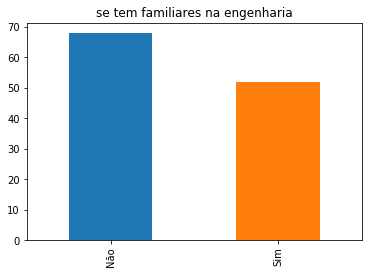

In [188]:
eng["Algum familiar trabalha na área de engenharia?"].value_counts().plot.bar()
plt.title("se tem familiares na engenharia")

Text(0.5,1,'Qual tipo de engenharia')

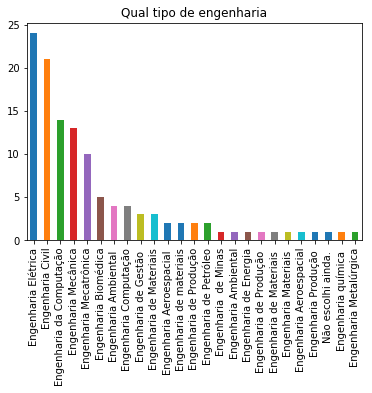

In [189]:
eng["TIPO_ENG"].value_counts().plot.bar()
plt.title("Qual tipo de engenharia")

Limpeza da Coluna de quais familiares na engenharia

In [313]:
mae = 0
maeL =[]

avos = 0
avosL =[]

pai = 0
paiL =[]

tio = 0
tioL=[]

irmaos =0
irmaosL =[]

ninguem = 0
ninguemL =[]

padrasto = 0
padrastoL=[]

primos = 0
primosL=[]

for k in eng['Se SIM na pergunta anterior,  quais familiares?']:
    split_v = k.split(",")
    for i in split_v:
        split_e = i.split("e")
    print(split_v)
    for k in split_v:
        if k == "pai" or k =="Pai" or k == "Meu pai" or k =="pai e mãe ":
            pai+=1
            paiL.append("pai")
        elif k == "mãe" or k == "Mãe" or k == "pai e mãe ":
            mae+=1
            maeL.append("mae")
        elif k =="irmã" or k =="irmão" :
            irmaos+=1
            irmaosL.append("irmao")
        elif k =="tio":
            tio+=1
            tioL.append("tio")
        elif "padrasto" in k.lower():
            padrasto+=1
            padrastoL.append("padrasto")
        elif "ninguém" in k.lower():
            ninguem+=1
            ninguemL.append("ninguem")
        elif "avô" in k.lower():
            avos+=1
            avosL.append("avos")
        elif "primos" or "primo" or "prima" in k.lower():
            primos +=1
            primosL.append("primos")
    
print(pai)
print(mae)
print(irmaos)

['Ninguém']
['Pai e tio']
['Pai e mãe ']
['Pai', ' padrasto e irmão ']
['Mãe e Pai']
['Primas']
['Meu pai']
['Ninguém']
['Ninguém']
['pai e mãe ']
['Pai']
['Ninguém']
['Pai ']
['Irmão', ' pai e tio']
['Ninguém']
['Pai']
['Pai']
['Meu pai. ']
['Ninguém']
['Dois primos e um tio']
['Ninguém']
['Ninguém']
['Ninguém']
['Ninguém']
['Pai', ' tio e primos']
['Ninguém']
['Avô']
['Pais', ' tios e primos ']
['Ninguém']
['Ninguém']
['Ninguém']
['Pai', ' Avô']
['Mãe', ' padrasto', ' irmã', ' avô', ' tia', ' tio.']
['Ninguém']
['Ninguém']
['Ninguém']
['Pai']
['Ninguém']
['Pai', ' Tio']
['Pai e irmão ']
['Ninguém']
['Pai', ' tio e irmao']
['Ninguém']
['Ninguém']
['Ninguém']
['Tios']
['Ninguém']
['Ninguém']
['Ninguém']
['Irmão']
['Pai']
['Mãe', ' avô e tios']
['Ninguém']
['Ninguém']
['Pai e tios']
['Mãe', ' vô', ' bisavô', ' primo']
['Ninguém']
['Ninguém']
['Ninguém']
['Tios']
['Ninguém']
['Ninguém']
['Tios e primos']
['Ninguém']
['Ninguém']
['Pai']
['Cunhado']
['Pai']
['Ninguém']
['Pai']
['Mãe ']
['N

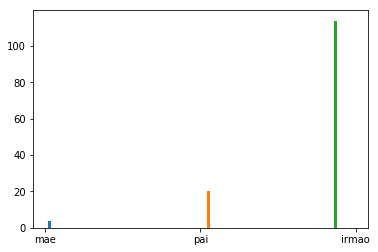

In [309]:
familia =[]
familia.append(maeL)
familia.append(paiL)
familia.append(irmaosL)
familia.append(tioL)
familia.append(padrastoL)
familia.append(ninguemL)
familia.append(avosL)
familia.append(primosL)
plt.hist(familia);

#  2a Análise: Faz Engenharia ou Adm/Eco no Insper?

# PRIMEIRO SHEET: meninas na engenharia Insper

In [16]:
# leitura do excel
eng_insper_2 = pd.read_excel('PESQUISA.xlsx', sheet_name = 0)



In [17]:
#limpeza e modificações


semestre=[]

for k in eng_insper_2.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
eng_insper_2.SEMESTRE = semestre


eng_insper_2['Se "Não", qual?'] = eng_insper_2['Se "Não", qual?'].fillna('Insper')

eng_insper_2['Se "Sim" na pergunta anterior,  quais familiares?'] = eng_insper_2['Se "Sim" na pergunta anterior,  quais familiares?'].fillna('Ninguém')
eng_insper_2['Faz Engenharia?']= 'Sim'


eng_insper_2.columns.tolist()

AttributeError: 'DataFrame' object has no attribute 'SEMESTRE'

In [ ]:
insper_idx.columns.tolist()

## QUARTO SHEET: adm/econo insper


Lendo arquivo Excel

In [ ]:
insper = pd.read_excel('PESQUISA.xlsx', sheet_name = 3)

Limpar o DataFrame e Renomear algumas colunas

In [ ]:
insper['Se "Não", qual?'] = insper['Se "Não", qual?'].fillna('Insper')
insper = insper.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual curso?": "Curso", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM", 'Algum familiar trabalha na área de adm e/ou econo?': 'Familiar na área?'})
semestre=[]

for k in insper.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
insper.SEMESTRE = semestre


In [ ]:
insper_idx=insper.set_index('NOME')

In [ ]:
insper_idx['Faz Engenharia?']='Não'

In [ ]:
Insper=pd.concat([eng_insper_2_analise, insper_idx])
Insper

In [ ]:
len(eng_insper_2_analise.columns.tolist())

In [ ]:
len(insper_idx.columns.tolist())

# Bibliografia:

* pd.concat:
https://stackoverflow.com/questions/21435176/appending-two-dataframes-with-same-columns-different-order